### Goal of the Dataset:

 

Purpose: The Riyadh Real Estate dataset is collected to train a machine learning model that recommends properties based on user-specified property type and preferred location in Riyadh. This streamlined approach aims to efficiently connect potential buyers or renters with listings that meet their financial and locational requirements, simplifying the property search process.

 

### Source of the Dataset:

[Riyadh Real Estate Dataset on Kaggle](https://www.kaggle.com/datasets/mohammedalsubaie/riyadh-real-estate)

 

### General Information about the Dataset:
- **Columns:** 11
- **Rows:** 1201
- **Details of the Data:**
  - **Property_ID:** Unique identifier for each property.
  - **Property Type:** Type of property, such as villa or apartment.
  - **Bedrooms:** Number of bedrooms in each property.
  - **Bathrooms:** Number of bathrooms in each property.
  - **Area:** Size of the property in square meters.
  - **Price:** Listing price of the property in Saudi Riyals.
  - **Description:** This field provides a concise summary of the property, including its type (e.g., villa), status (e.g., for sale), and location within a specific area of Riyadh (e.g., Al Yasmin, North Riyadh).
  - **Location:** Specifies the district and its orientation within Riyadh (e.g., Northern, Southern, Eastern, Western).
  - **District:** Specific district within Riyadh where the property is located.
  - **City:** All properties are located in the city of Riyadh.
  - **Agency Name:** Real estate agency that listed the property.

## Summary of the Dataset

This section provides an overview of the dataset, including sample records, statistical summaries, and visualizations. 

### Key Components:
1. **Sample Data**: Displaying a few records from the dataset.
2. **Statistical Summary**: Showing distribution of key numerical columns.
3. **Missing Values Analysis**: Identifying columns with missing data.
4. **Visualizations**: Histograms and distribution graphs for better insights.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re

# Load the dataset from the "Dataset" folder
df = pd.read_excel('Dataset/Aqar_Riyadh.xlsx')

# Display the summary of the dataset, including the number of non-null values and data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_ID    1200 non-null   object 
 1   Property Type  1200 non-null   object 
 2   Bedrooms       1132 non-null   object 
 3   Bathrooms      1129 non-null   float64
 4   Area           1200 non-null   object 
 5   Price          1200 non-null   object 
 6   Description    1200 non-null   object 
 7   Location       1200 non-null   object 
 8   District       1200 non-null   object 
 9   City           1192 non-null   object 
 10  Agency_Name    821 non-null    object 
dtypes: float64(1), object(10)
memory usage: 103.3+ KB


In [4]:
# Take a random sample of 10 rows from the dataset
sample_df = df.sample(n=10, random_state=80)

# Display the sample
sample_df

,Property_ID,Property Type,Bedrooms,Bathrooms,Area,Price,Description,Location,District,City,Agency_Name
643,L299443289,شقة,2,2.0,68 م2,"700,000","شقة للبيع في الرمال, شرق الرياض",الرمال، شرق الرياض، الرياض,حي الرمال,الرياض,شركة نهضة التطور العقارية
12,T771872957,شقة,3,3.0,893 م2,"590,000",شقة 3 غرف نوم للبيع في ظهرة لبن، الرياض,ظهرة لبن، غرب الرياض، الرياض,حي ظهرة لبن,الرياض,شركة صروح السعودية للتطوير والاستثمار العقاري
1122,S738734364,فیلا,4,4.0,250 م2,"2,400,000",فيلا للبيع في حي اليرموك، شرق الرياض,اليرموك، شرق الرياض، الرياض,حي اليرموك,الرياض,سكن المعالي للعقارات
63,Z104757533,فیلا,5,4.0,200 م2,"1,300,000",للبيع فيلا في حي الجنادرية مخطط المعالي,الجنادرية، شرق الرياض، الرياض,حي الجنادرية,الرياض,شركة قمة الوطن العقارية
588,Q597766326,دور,4,3.0,158 م2,"800,000",دور للبيع في السعادة، شرق الرياض,السعادة، شرق الرياض، الرياض,حي السعادة,الرياض,مساكن ركاز للعقارات
799,Q837162721,فیلا,5,5.0,400 م2,"1,850,000",فيلا 200 م للبيع في المهدية، الرياض,المهدية، غرب الرياض، الرياض,حي المهدية,الرياض,NaN
53,U008630173,ارض سكنية,NaN,NaN,450 م2,"2,700,000",أرض سكنية للبيع في العارض، شمال الرياض,العارض، شمال الرياض، الرياض,حي العارض,الرياض,NaN
957,C324114034,دور,3,3.0,503 م2,"1,680,000","دور للبيع في المونسية, شرق الرياض",المونسية، شرق الرياض، الرياض,حي المونسية,الرياض,شركة مباشر للعقارات للتسويق العقاري
1123,N785395709,فیلا,5,5.0,250 م2,"2,400,000",لليع فيلا درج داخلي في اليرموك، شرق الرياض,اليرموك، شرق الرياض، الرياض,حي اليرموك,الرياض,سكن المعالي للعقارات
254,X011560087,شقة,3,5.0,163 م2,"530,000",شقة للبيع في عكاظ، جنوب الرياض,عكاظ، جنوب الرياض، الرياض,حي عكاظ,الرياض,شركة نجمة التميز للعقارات


 **-** The 'City' column will be dropped because all values are "الرياض" and our recommendation system will focus only on properties in Riyadh, making it unnecessary.

 **-** The 'Description' column will be dropped because it contains redundant and inconsistent information in its writing.


In [8]:
# Display a summary statistics for all columns in the dataset, including both numerical and categorical columns
# This will provide count, unique values, top values, frequency, mean, std, min, max, and percentiles for each column
df.describe(include="all")

,Property_ID,Property Type,Bedrooms,Bathrooms,Area,Price,Description,Location,District,City,Agency_Name
count,1200,1200,1132,1129.000000,1200,1200,1200,1200,1200,1192,821
unique,1190,8,15,NaN,317,288,664,108,108,1,151
top,P184680884,شقة,3,NaN,500 م2,"860,000",شقة للبيع في بدر، جنوب الرياض,بدر، جنوب الرياض، الرياض,حي بدر,الرياض,شركة نجمة التميز للعقارات
freq,3,395,472,NaN,94,74,32,130,130,1192,198
mean,NaN,NaN,NaN,3.955713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.533834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 **-** The 'Property_ID' contains 10 non-unique values, which will be handled appropriately.

 **-** Rows without 'Agency_Name' will be dropped because without an agency, it would be difficult for someone interested in the property to contact the company.

**-** 8 rows without a 'City' value will be dropped because they lack important location data.


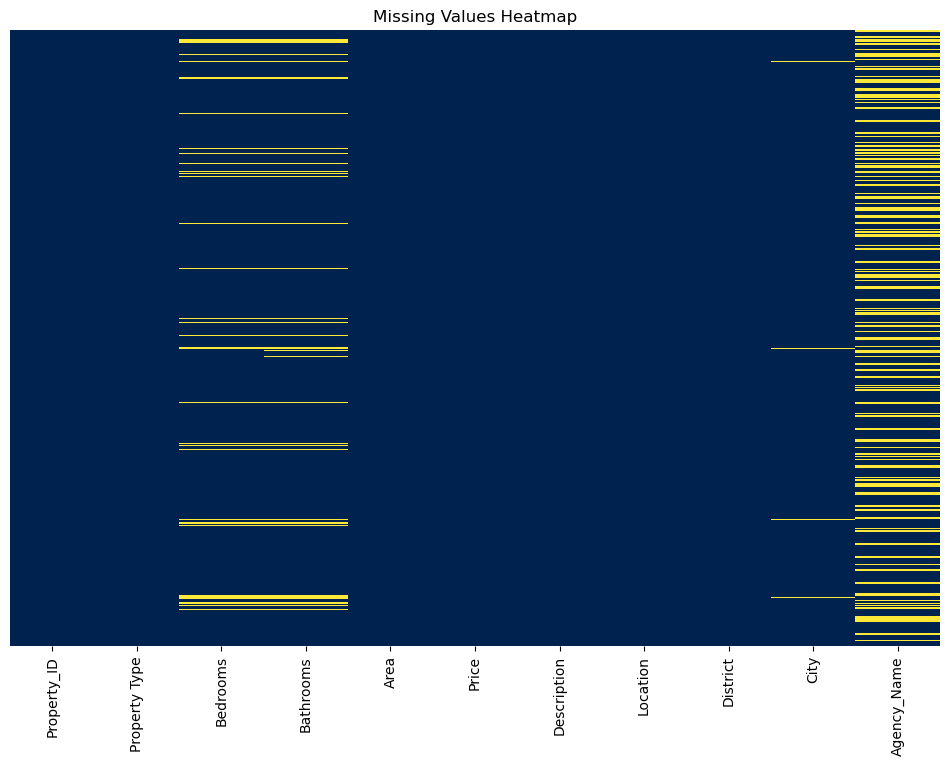

In [11]:
# Generate a heatmap to visualize missing values in the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='cividis', cbar=False, yticklabels=False)

# Add a title to the plot
plt.title('Missing Values Heatmap')

# Display the plot
plt.show()

This Missing Values Heatmap provides a clear visual summary of where data is missing across different features of a property dataset:

Color Coding:

- Dark Blue areas represent non-missing values.

- Yellow areas indicate missing values.

Observations:

- Features like Property_ID, Price, and Description have no missing values.

- Columns such as Area, Location, and District have partial missing data.

- City and especially Agency_Name have a significant amount of missing values, suggesting potential issues with data completeness for these features.

- Features like Bedrooms and Bathrooms have relatively fewer missing entries.

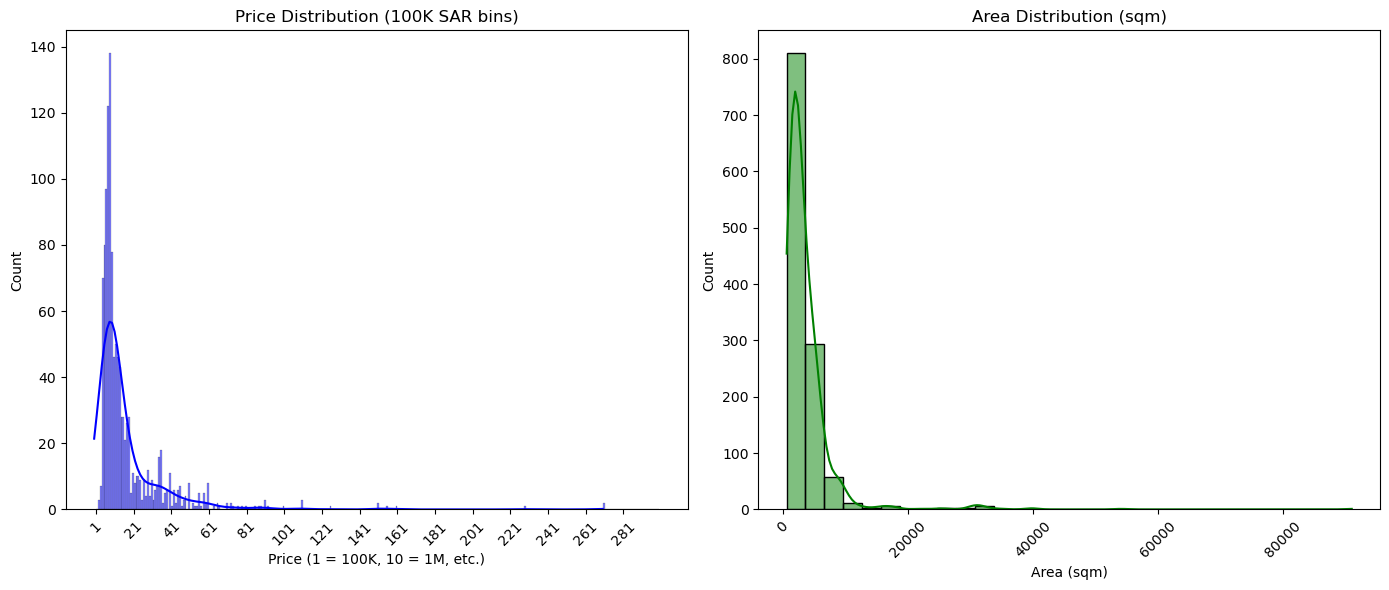

In [13]:
# Clean column names
df.columns = df.columns.str.strip()

# Use the numeric conversion for plotting, without altering the original data
df_for_plotting = df.copy()

df_for_plotting['Price'] = pd.to_numeric(df_for_plotting['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
df_for_plotting['Area'] = pd.to_numeric(df_for_plotting['Area'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Plot the distribution of Price and Area in separate plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the price distribution 
sns.histplot(df_for_plotting['Price'] / 100_000, bins=range(1, 301), kde=True, color="blue", ax=axes[0])

# Add a title and labels to the plot
axes[0].set_title("Price Distribution (100K SAR bins)")
axes[0].set_xlabel("Price (1 = 100K, 10 = 1M, etc.)")
axes[0].set_xticks(range(1, 301, 20))
axes[0].tick_params(axis='x', rotation=45)

# Plot the area distribution
sns.histplot(df_for_plotting['Area'], bins=30, kde=True, color="green", ax=axes[1])

# Add a title and labels to the plot
axes[1].set_title("Area Distribution (sqm)")
axes[1].set_xlabel("Area (sqm)")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap and ensure good spacing
plt.tight_layout()

# Display the plots
plt.show()

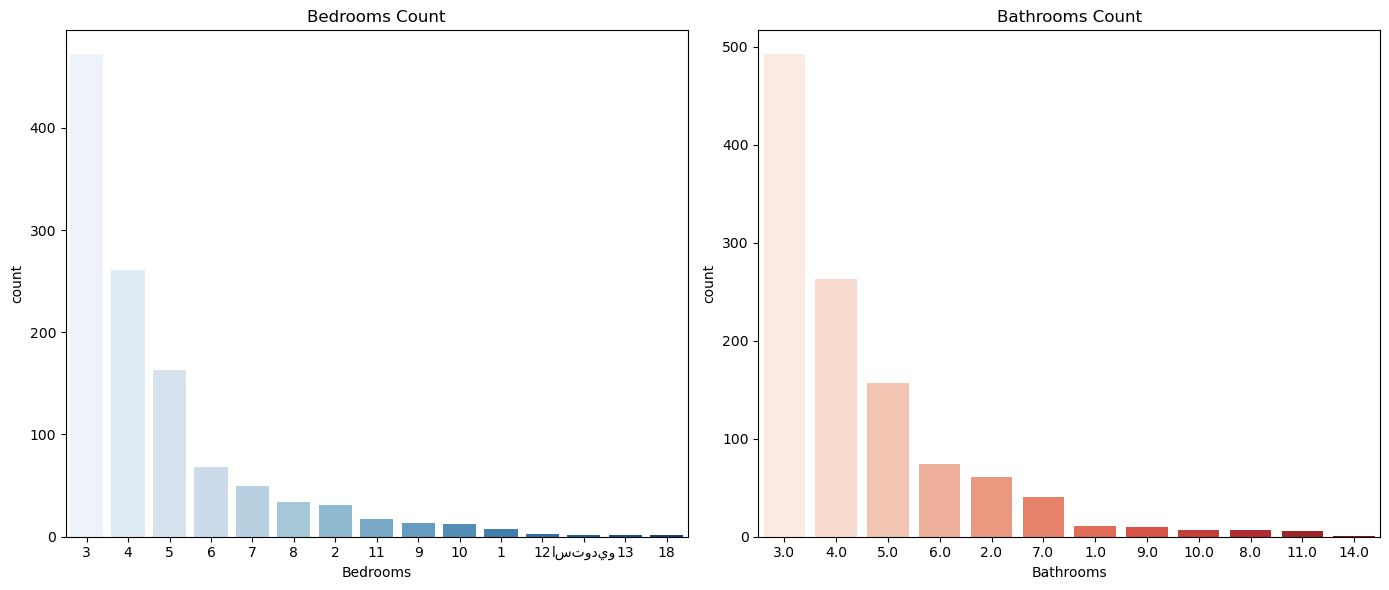

In [15]:
# Plot the distribution of Bedrooms and Bathrooms in separate plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the count distribution for Bedrooms
sns.countplot(x=df['Bedrooms'], order=df['Bedrooms'].value_counts().index, ax=axes[0], palette="Blues")

# Add a title to the plot
axes[0].set_title("Bedrooms Count")  

# Plot the count distribution for Bathrooms
sns.countplot(x=df['Bathrooms'], order=df['Bathrooms'].value_counts().index, ax=axes[1], palette="Reds")

# Add a title to the plot
axes[1].set_title("Bathrooms Count")  

# Adjust layout to prevent overlap and ensure good spacing
plt.tight_layout()

# Display the plots
plt.show()  

This figure consists of two count plots side-by-side, illustrating the frequency distribution of values in the Bedrooms and Bathrooms columns of a property dataset.

#### Left Plot: Bedrooms Count
The most common number of bedrooms is 3, followed by 4 and 5.

There's a noticeable drop in frequency as the bedroom count increases beyond 5.

A few entries are highly uncommon, such as properties with 11, 12, 13, or 18 bedrooms.

Importantly, the plot reveals non-numeric and invalid entries, "استودیو".

These should be treated as data quality issues and cleaned

#### Right Plot: Bathrooms Count
The most frequent number of bathrooms is 3, followed by 4 and 5.

As with bedrooms, frequency declines as the number increases, but the trend is slightly more gradual.

Some extreme values like 10, 11, and 14 bathrooms are rare but still valid.


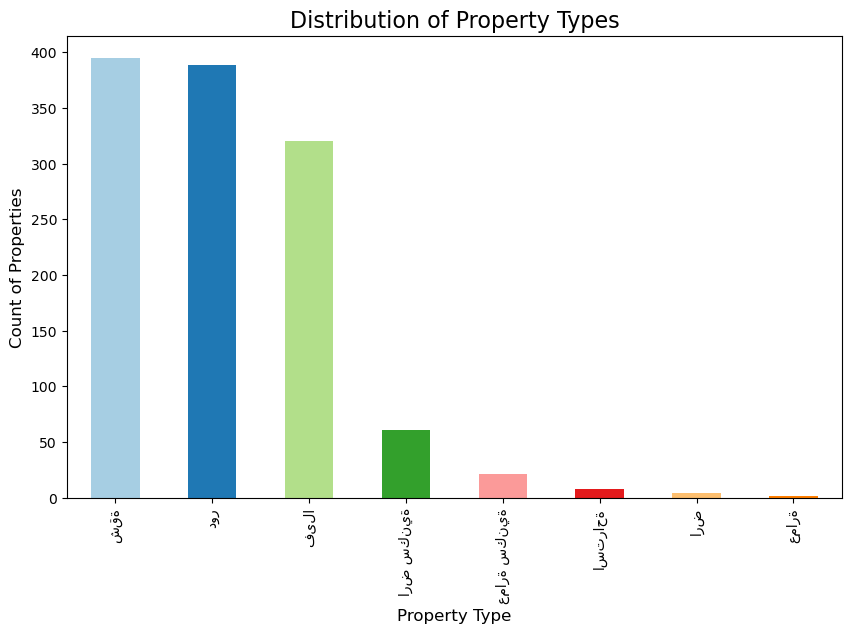

In [18]:
# Count the number of properties by original Property Type
property_type_count = df['Property Type'].value_counts()

# Plot a bar chart for property type distribution 
plt.figure(figsize=(10, 6))
property_type_count.plot(kind='bar', color=plt.cm.Paired.colors)

# Add a title and labels to the plot
plt.title('Distribution of Property Types', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count of Properties', fontsize=12)

# Display the plot
plt.show()

##### **The order of Property Types in the chart is:**
 - شقة
 - دور
 - فيلا
 - ارض سكنية
 - عمارة سكنية
 - استراحة
 - ارض
 - عمارة
   
 "ارض" and "ارض سكنية" are considered duplicates and should be combined under the name "ارض". 

 Similarly, "عمارة" and "عمارة سكنية" should be treated as the same and combined under "عمارة". 

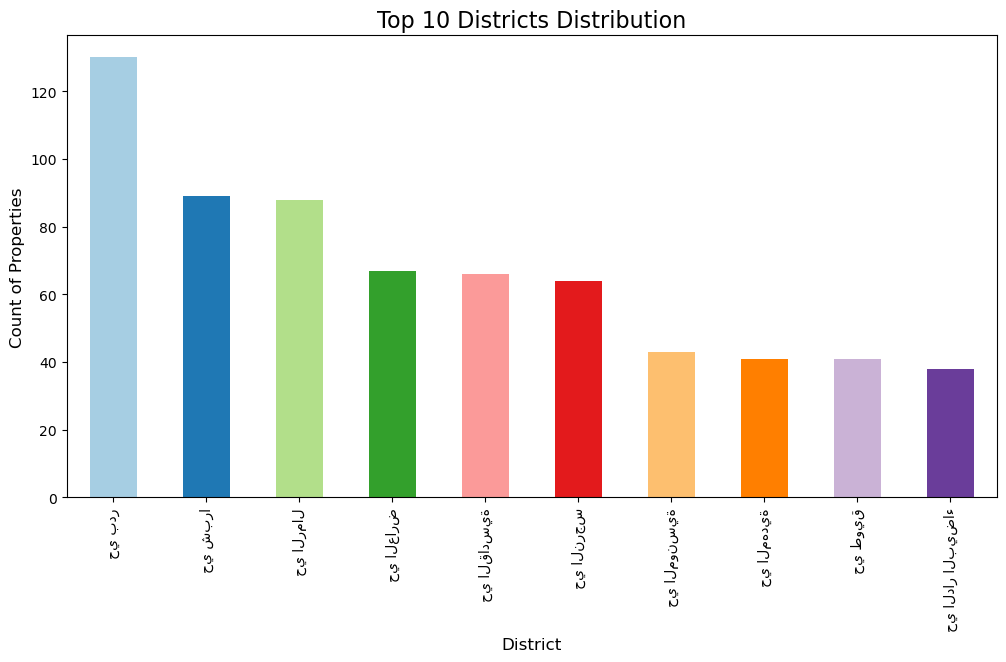

In [21]:
# Count the number of properties in each District
district_distribution = df['District'].value_counts()

# Select top 10 most frequent districts
top_districts = district_distribution.head(10)

# Plot a bar chart for District distribution (Top 10)
plt.figure(figsize=(12, 6))
top_districts.plot(kind='bar', color=plt.cm.Paired.colors)

# Add a title and labels to the plot
plt.title('Top 10 Districts Distribution', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Count of Properties', fontsize=12)

# Display the plot
plt.show()

#### **The order of the top 10 District in the chart is:**
 - حي بدر
 - حي شبرا
 - حي الرمال
 - حي العارض
 - حي القادسية
 - حي النرجس
 - حي المونسية
 - حي المهدية
 - حي طويق
 - حي الدار البيضاء

In [24]:
# Number of unique districts
num_districts = df['District'].nunique()

# Display the result
print(f'The number of unique districts is: {num_districts}')

The number of unique districts is: 108


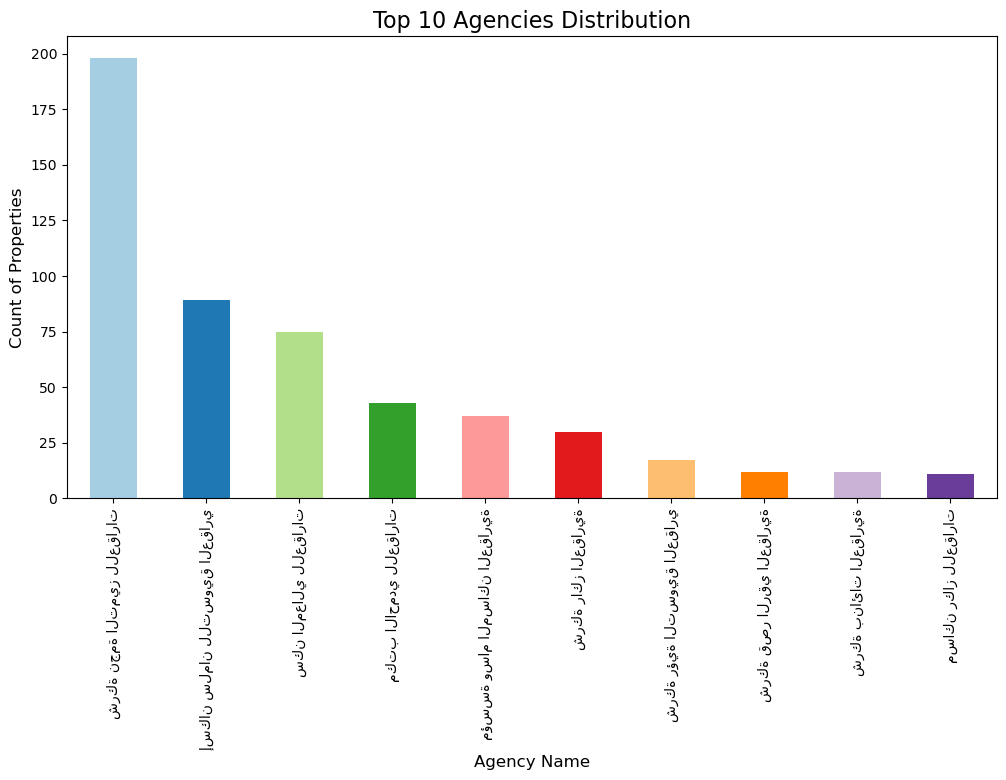

In [26]:
# Count the number of properties for each Agency
agency_distribution = df['Agency_Name'].value_counts()

# Select top 10 most frequent agencies
top_agencies = agency_distribution.head(10)

# Plot a bar chart for Agency distribution (Top 10)
plt.figure(figsize=(12, 6))
top_agencies.plot(kind='bar', color=plt.cm.Paired.colors)

# Add a title and labels to the plot
plt.title('Top 10 Agencies Distribution', fontsize=16)
plt.xlabel('Agency Name', fontsize=12)
plt.ylabel('Count of Properties', fontsize=12)

# Display the plot
plt.show()

#### **The order of the top 10 Agencies in the chart is:**
 - شركة نجمة التميز للعقارات
 - اسكان سلمان للتسويق العقاري
 - سكن المعالي للعقارات
 - مكتب الاحمدي للعقارات
 - مؤسسة وسام المساكن العقارية
 - شركة راكز العقارية
 - شركة رؤية التسويق العقاري
 - شركة قصر الرقي العقارية
 - شركة بنائات العقارية
 - مساكن ركاز للعقارات

In [29]:
# Number of unique agencies
num_Agency = df['Agency_Name'].nunique()

# Display the result
print(f'The number of unique agencies is: {num_Agency}')

The number of unique agencies is: 151


##  Data Preprocessing
This section outlines the preprocessing steps taken to clean and prepare the dataset for analysis. Each step includes a justification  to guarantee data quality and consistency.


### Step 1: Handle Missing Values
**Justification**: We remove rows with missing values in Primary columns such as `Property_ID`, `Property Type`, `Price`, `Bedrooms`, `Bathrooms`, and `Agency_Name` to avoid wrong prediction and maintain data integrity.


In [33]:
df.dropna(subset=['Property_ID', 'Property Type', 'Price', 'Bedrooms', 'Bathrooms', 'Agency_Name'], inplace=True)

### Step 2: Remove Duplicates
**Justification**: We remove Duplicate `Property_ID` entries. Because, they can affect the analysis and make the model biased during training and to ensures that each property is uniquely represented.


In [36]:
df.drop_duplicates(subset='Property_ID', inplace=True)

### Step 3: Drop Unnecessary Columns
**Justification**: We removed the `Description` column because it contains unstructured text that doesn't contribute to data analysis or model training. Additionally, we removed the `City` column since all records are from Riyadh, making it unnecessary.


In [39]:
df.drop(columns=['Description', 'City'], inplace=True)

### Step 4: Standardize Numerical Values
**Justification**: The `Price` and `Area` columns contain commas, We standardized the numerical format because commas can cause inconsistencies, ensuring  proper numerical formatting and better model training.

In [42]:
df['Price'] = df['Price'].str.replace(',', '', regex=False).astype(float)
df['Area'] = df['Area'].str.replace(',', '', regex=False)

### Step 5: Clean Area Column
**Justification**: The `Area` column includes the Arabic character `م2` (square meters). We remove this unit to ensure the column is purely numeric and ready for calculations.

In [45]:
df['Area'] = df['Area'].str.replace('م2', '', regex=False).str.strip().astype(float)

### Step 6: Convert `Bedrooms` to Integer
**Justification**: We remove some values in the `Bedrooms` column are not numeric such as "استوديو "which can mislead the model Converting valid numbers to integers ensures accurate calculations and filtering.



In [48]:
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')  # Convert non-numeric to NaN
df.dropna(subset=['Bedrooms'], inplace=True)  # Drop rows with NaN in Bedrooms
df['Bedrooms'] = df['Bedrooms'].astype(int)  # Convert Bedrooms back to integer

### Step 7: Clean `District` Column
**Justification**: We remove the prefix `حي` (neighborhood)  in the `District` column. Because it is repetitive and does not add meaningful information.Removing it simplifies the data.


In [51]:
df['District'] = df['District'].str.replace('حي', '', regex=False).str.strip()

### Step 8: Extract Directional Words from `Location`
**Justification**: The `Location` column contains detailed descriptions which is mentioned in other coulmns , but only directional terms شمال (North), جنوب (South), شرق (East), غرب (West), وسط (Center). are relevant.Extracting only these words helps maintain consistency and enhances location-based filtering for machine learning models.


In [54]:
df['Location'] = df['Location'].apply(lambda x: '،'.join(re.findall(r'(شمال|جنوب|شرق|غرب|وسط)', x)))

### Step 9: Clean `Property Type` Column
**Justification**: we remove the word `سكنية` (residential) is unnecessary in `Property Type` (e.g., "عمارة" instead of "عمارة سكنية").
This step makes the column cleaner and more consistent.n, improving dataset clarity and more standardized classification of property types.

In [57]:
df['Property Type'] = df['Property Type'].str.replace('سكنية', '', regex=False).str.strip()

### Final Step: Save the Cleaned Dataset, the cleaned dataset in Dataset floder
**Justification**: We save The cleaned dataset.


In [60]:
df.to_csv("Dataset/cleaned_dataset.csv", index=False, encoding="utf-8")